In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv, find_dotenv
import os
from datetime import date

pd.set_option("display.max_columns", None)


In [38]:
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)
FACEIT_PLAYERID = os.environ.get("FACEIT_PLAYERID")


In [39]:
DF_all = pd.read_pickle("./AllDatabz2.pkl", compression="bz2")
DF_me = DF_all.query("PlayerId == @FACEIT_PLAYERID")

In [4]:
DF_me.loc[:,"index"]= np.arange(len(DF_me))

C:\Users\dima1\AppData\Local\Temp\ipykernel_36636\360674515.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = DF_me.query("SteamData == False"), x = "CreatedAt", y = "Kills", palette=colours)


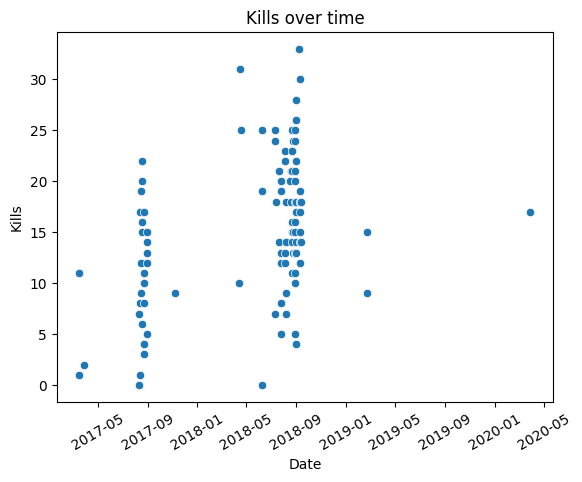

In [5]:
colours = sns.color_palette("rocket", 3)
sns.scatterplot(data = DF_me.query("SteamData == False"), x = "CreatedAt", y = "Kills", palette=colours)
plt.title("Kills over time")
plt.xlabel("Date")
plt.xticks(rotation = 30)
plt.show()

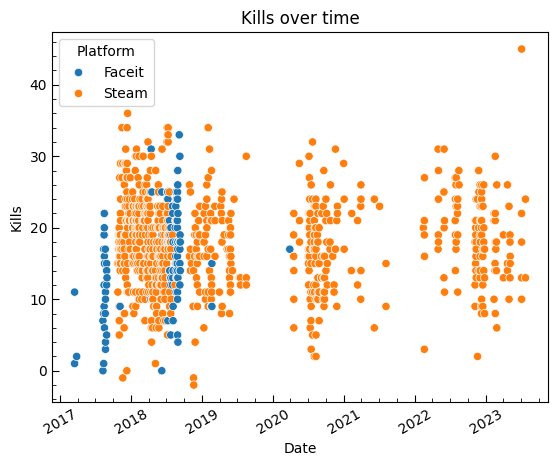

In [34]:
sns.scatterplot(data = DF_me, x = "CreatedAt", y = "Kills", hue = "SteamData", legend="brief")
plt.title("Kills over time")
plt.xlabel("Date")
plt.xticks(rotation = 30)
plt.minorticks_on()
plt.tick_params(direction = "in", which = "major", length = 5)
plt.tick_params(direction = "in", which = "minor", length = 3)
L = plt.legend(title = "Platform")
L.get_texts()[0].set_text("Faceit")
L.get_texts()[1].set_text("Steam")
plt.show()

In [41]:
DF_all.shape

(397327, 17)

In [43]:
DF_me.select_dtypes(include=np.number).columns.tolist()
Maps = (
    DF_me.groupby(by="Map")
    .aggregate(
        {
            "Kills": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Map": "count",
            "Headshots%": "mean",
            "Result": lambda x: pd.value_counts(x)[0],
        }
    )
    .rename({"Map": "TimesPlayed"}, axis=1)
)


C:\Users\dima1\AppData\Local\Temp\ipykernel_36636\2277180220.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  DF_me.groupby(by="Map")
C:\Users\dima1\AppData\Local\Temp\ipykernel_36636\2277180220.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  DF_me.groupby(by="Map")
C:\Users\dima1\AppData\Local\Temp\ipykernel_36636\2277180220.py:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  "Result": lambda x: pd.value_counts(x)[0],
C:\Users\dima1\AppData\Local\Temp\ipykernel_36636\2277180220.py:11: FutureWarning: Series.__getitem__ trea

In [44]:
# Maps.reset_index(drop = False, inplace=True)
Maps.index

Index(['de_cache', 'de_cbble', 'de_dust2', 'de_inferno', 'de_mirage',
       'de_nuke', 'de_overpass', 'de_train'],
      dtype='object', name='Map')

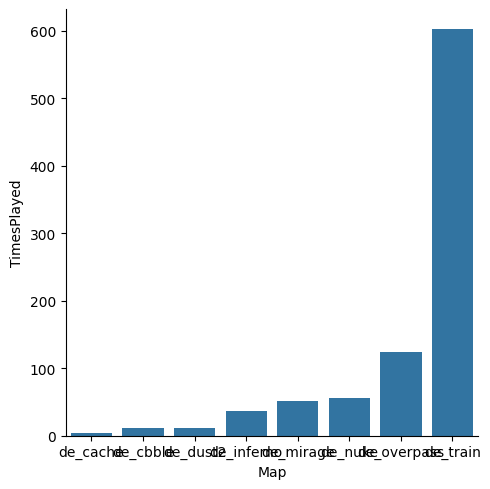

In [178]:
g = sns.catplot(
    data=Maps.sort_values(by = "TimesPlayed"),
    y="TimesPlayed",
    x=Maps.index,
    kind = "bar"
)
# plt.plot()

In [180]:
Maps.loc["Other Maps",:] = Maps.loc["de_train",:] + Maps.loc["de_cbble",:] + Maps.loc["de_nuke",:]

In [181]:
Maps = Maps.sort_values(by = "TimesPlayed")

In [182]:
Maps

,Kills,Deaths,Mvps,TimesPlayed,Headshots%,Result
Map,,,,,,
de_nuke,80.0,80.0,11.0,4.0,47.500000,2.0
de_cbble,190.0,194.0,26.0,11.0,50.181818,6.0
de_train,107.0,195.0,9.0,11.0,41.545455,10.0
Other Maps,377.0,469.0,46.0,26.0,139.227273,18.0
de_inferno,549.0,564.0,66.0,36.0,42.638889,19.0
de_dust2,953.0,868.0,133.0,51.0,43.490196,24.0
de_overpass,872.0,946.0,110.0,55.0,45.363636,31.0
de_cache,2153.0,2144.0,280.0,124.0,44.274194,57.0
de_mirage,10753.0,10013.0,1469.0,602.0,45.875415,294.0


In [183]:
Maps["WinRate%"] = (Maps["Result"] / Maps["TimesPlayed"] * 100).astype(int)
Maps.sort_values(by="TimesPlayed", inplace=True, ascending=False)
Maps["K/D"] = round(Maps["Kills"] / Maps["Deaths"], 2)


In [184]:
def func(pct, allvalues):
    absolute = max(int(pct / 100 * np.sum(allvalues)), 1)
    return "{:.1f}%\n({:d} games)".format(pct, absolute)


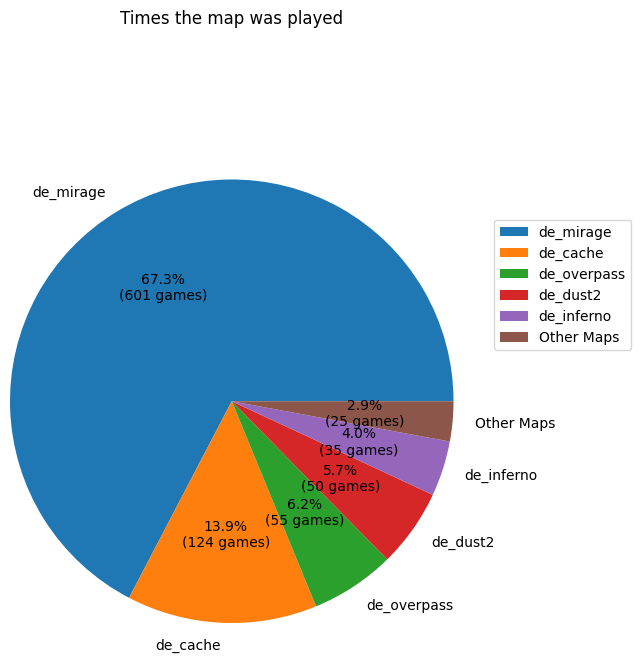

In [185]:
fig, ax = plt.subplots()
# data = Maps.query("TimesPlayed > 10")["TimesPlayed"]
data = Maps.loc[:"Other Maps","TimesPlayed"]
p, tx, autotexts = ax.pie(
    data, labels=data.index, autopct=lambda pct: func(pct, data), radius=1.5
)
ax.xaxis.set_label_position("top")
ax.set_title("Times the map was played", y=1.5)

plt.legend(bbox_to_anchor=(1.6, 1.01))
plt.show()


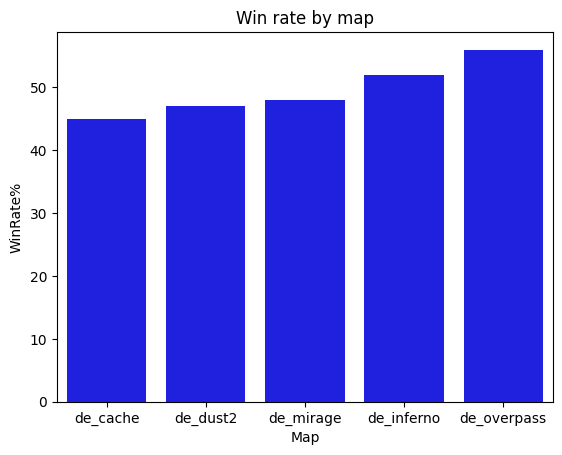

In [199]:
fig, ax = plt.subplots()
data = Maps.loc[:"de_inferno",:].sort_values(by = "WinRate%")

sns.barplot(data = data, x = data.index, y = "WinRate%", color="blue")
# ax.bar(x = data.index, height)
# ax.xaxis.set_label_position("top")
plt.title("Win rate by map")
# ax.set_title("Times the map was won", y=1.5)
# plt.legend(bbox_to_anchor=(1.6, 1.01))
plt.show()


In [187]:
def heatmap(data, title=""):
    corr = data.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(corr.columns), 1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=45)
    ax.set_yticks(ticks)
    ax.set_xticklabels(corr.columns)
    ax.set_yticklabels(corr.columns)

    matrix = pd.DataFrame(data.corr(method="pearson")).round(2)
    for i in range(len(matrix)):
        for j in range(len(matrix.iloc[0])):
            text = ax.text(j, i, matrix.iloc[i, j], ha="center", va="center", color="w")
    ax.set_title(title, pad=20)


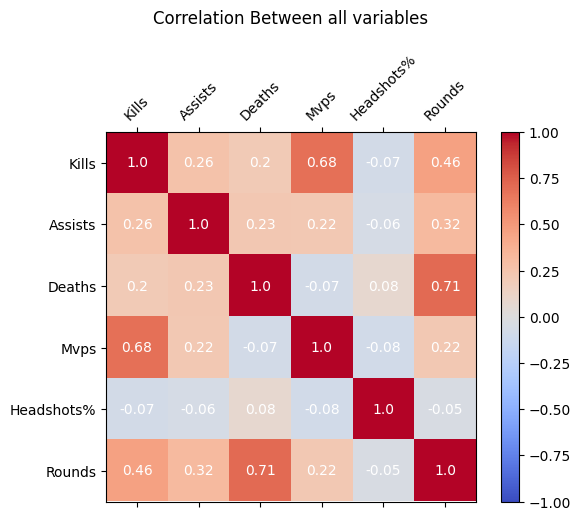

In [189]:
heatmap(
    DF_me.drop(columns=["PlayerId", "Year", "Month", "Day", "DateOrdinal", "index","CreatedAt", "level_0", "SteamData", "Score", "Map", "Result"], errors="ignore"),
    title="Correlation Between all variables",
)
# there is a correlation between installs and rating count -> more people installs leads to more people commenting
# next to no correlaiton between everything


Text(20.513422818791945, 288, 'mean: 18')

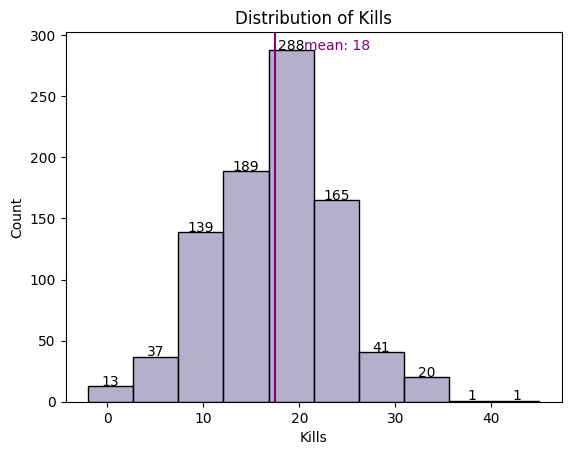

In [190]:
ax = sns.histplot(DF_me["Kills"], color="#9d94ba", bins=10, kde=False)
ax.set(title="Distribution of Kills")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height()  # get the height of each bar
    # adding text to each bar
    ax.text(
        x=p.get_x()
        + (
            p.get_width() / 2
        ),  # x-coordinate position of data label, padded to be in the middle of the bar
        y=height + 0.2,  # y-coordinate position of data label, padded 0.2 above bar
        s="{:.0f}".format(height),  # data label, formatted to ignore decimals
        ha="center",
    )

plt.axvline(DF_me["Kills"].mean(), color="purple", label="mean")
# adding data label to mean line
plt.text(
    x=DF_me["Kills"].mean()
    + 3,  # x-coordinate position of data label, adjusted to be 3 right of the data point
    y=max(
        [h.get_height() for h in ax.patches]
    ),  # y-coordinate position of data label, to take max height
    s="mean: {:.0f}".format(DF_me["Kills"].mean()),  # data label
    color="purple",
)  # colour


# https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9


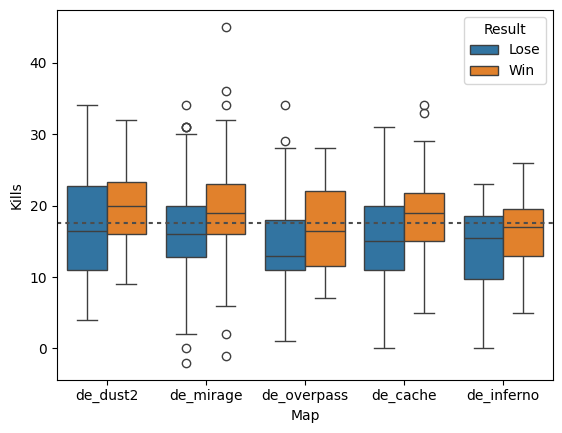

In [191]:
mean = DF_me["Kills"].mean()

ax = sns.boxplot(
    data=DF_me.query("Result in ['Lose', 'Win'] & Map in ['de_mirage', 'de_dust2', 'de_overpass', 'de_inferno', 'de_cache']"), y="Kills", x="Map", hue="Result"
)
ax.axhline(mean, color=".3", dashes=(2, 2))
plt.show()


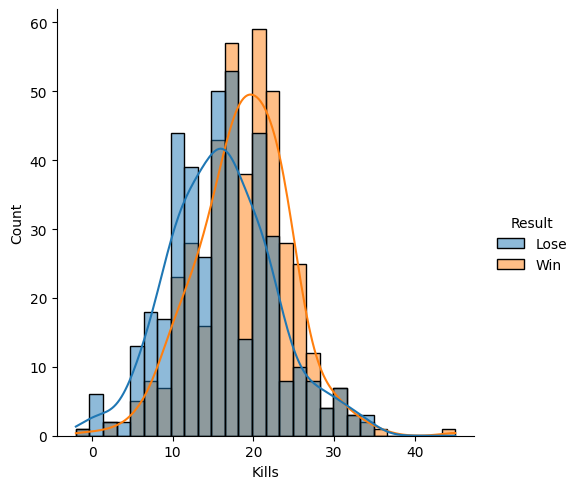

In [192]:
sns.displot(
    data=DF_me.query("Result in ['Lose', 'Win']"),
    x="Kills",
    multiple = "layer",
    hue="Result",
    kde=True,
    facet_kws=dict(sharex=False, sharey=True),
)


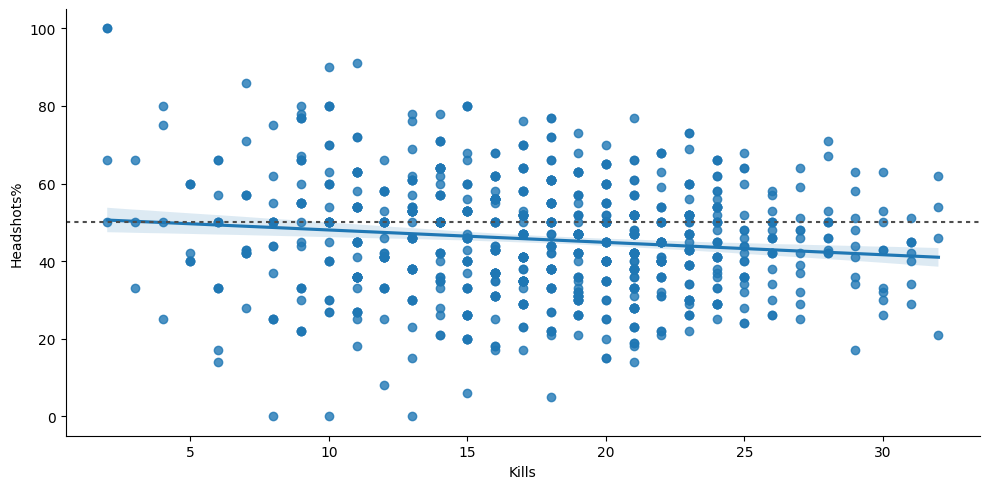

In [193]:
q_low = DF_me["Kills"].quantile(0.01)
q_hi = DF_me["Kills"].quantile(0.99)

DF_filtered = DF_me[(DF_me["Kills"] < q_hi) & (DF_me["Kills"] > q_low)]
g = sns.lmplot(data=DF_filtered, y="Headshots%", x="Kills", aspect=2)
for ax in g.axes.flat:
    ax.axhline(50, color=".3", dashes=(2, 2))
plt.show()


In [194]:
DF_me["K/D"] = DF_me["Kills"] / DF_me["Deaths"]
DF_me["K/A"] = DF_me["Kills"] / DF_me["Assists"]

data = DF_me.query("Rounds > 16")
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data[~data["K/D"].isna()]

q_low = DF_me["Kills"].quantile(0.01)
q_hi = DF_me["Kills"].quantile(0.99)

DF_filtered = data[(data["Kills"] < q_hi) & (data["Kills"] > q_low)]


C:\Users\dima1\AppData\Local\Temp\ipykernel_36184\3676783006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_me["K/D"] = DF_me["Kills"] / DF_me["Deaths"]
C:\Users\dima1\AppData\Local\Temp\ipykernel_36184\3676783006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_me["K/A"] = DF_me["Kills"] / DF_me["Assists"]
C:\Users\dima1\AppData\Local\Temp\ipykernel_36184\3676783006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

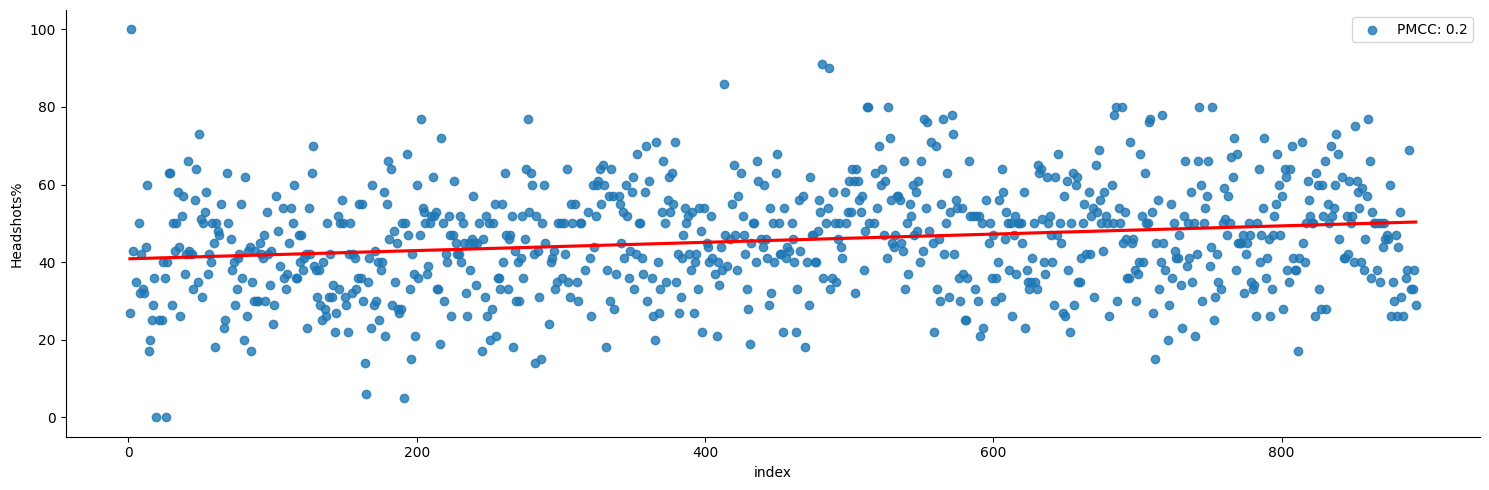

In [195]:
g = sns.lmplot(
    data=DF_filtered,
    x="index",
    y="Headshots%",
    ci=0,
    line_kws={"color": "red"},
    facet_kws=dict(sharex=False, sharey=True),
    aspect=3,
    legend=True,
    # hue = "Result"
)
g.axes[0][0].axes.collections[0].set_label(
    f"PMCC: {round(np.corrcoef(DF_filtered['index'], DF_filtered['Headshots%'])[0,1], 2)}"
)
plt.tight_layout()
plt.legend()
plt.show()


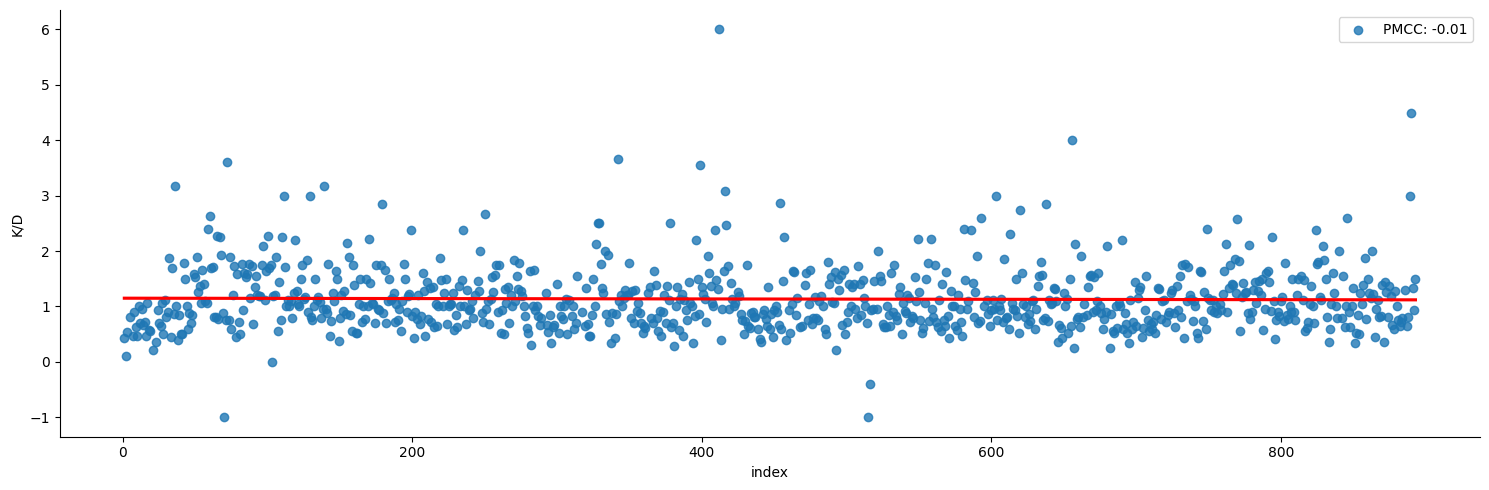

In [196]:
q_low = DF_me["K/D"].quantile(0.1)
q_hi = DF_me["K/D"].quantile(0.9)

DF_filtered = data[(data["K/D"] < q_hi) & (data["K/D"] > q_low)]

g = sns.lmplot(
    data=data,
    x="index",
    y="K/D",
    ci=0,
    line_kws={"color": "red"},
    facet_kws=dict(sharex=False, sharey=True),
    aspect=3,
    legend=True,
    # hue = "Result"
)
g.axes[0][0].axes.collections[0].set_label(
    f"PMCC: {round(np.corrcoef(data['index'], data['K/D'])[0,1], 2)}"
)
plt.tight_layout()
plt.legend()
plt.show()


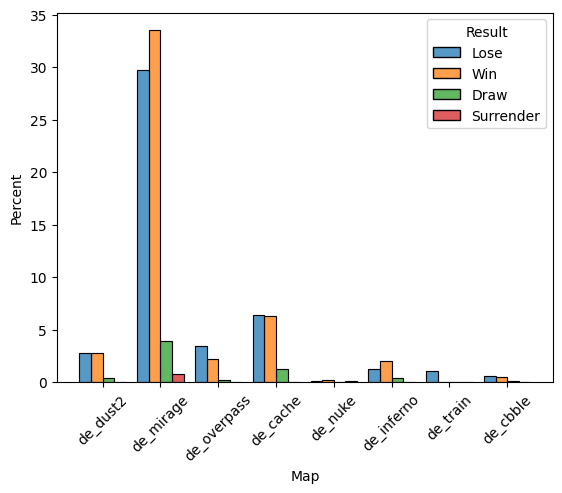

In [197]:
sns.histplot(
    data=data,
    x="Map",
    hue="Result",
    multiple="dodge",
    shrink=0.8,
    stat="percent",
    discrete=True,
)
plt.xticks(rotation=45)
plt.show()
